## DATA MANIPULATION & ANALYSIS IN PYTHON FOR BEGINNERS
Jupter Notebook: Prepared by Thatayotlhe Dinona
Dataset source: Kaggle:https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales






## IMPORT NECESSARY LIBRARIES

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
# Set Display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


## LOADING THE DATASET

In [152]:
sales= pd.read_csv(r"C:\Users\ThatayotlheDinona\Downloads\supermarket_sales.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## DATA CLEANING
common data quality issues
1.missing values
2.duplicates
3.inccorrect data types
4.inconsistent formatting
5.renaming columns


In [33]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [37]:
sales.duplicated().sum()

0

In [45]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [94]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [114]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [128]:
print(sales['Date'].dtype)


datetime64[ns]


In [136]:
sales['Time'].astype(str).head()

0    13:08
1    10:29
2    13:23
3    20:33
4    10:37
Name: Time, dtype: object

In [146]:
pd.to_datetime(sales['Time']).head()

C:\Users\ThatayotlheDinona\AppData\Local\Temp\ipykernel_17244\1819990857.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sales['Time']).head()


0   2024-11-20 13:08:00
1   2024-11-20 10:29:00
2   2024-11-20 13:23:00
3   2024-11-20 20:33:00
4   2024-11-20 10:37:00
Name: Time, dtype: datetime64[ns]

In [174]:
sales['Invoice ID'] = sales['Invoice ID'].str.replace('-','')

In [176]:
sales = sales.rename(columns={'cogs': 'Cost of Goods Sold'})
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of Goods Sold,gross margin percentage,gross income,Rating
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## DATA MANIPULATION AND EXPLORATORY ANALYSIS
1.counting categorical values
2.grouping and summarisation
3.Descriptive statistics


<Axes: ylabel='gross margin percentage'>

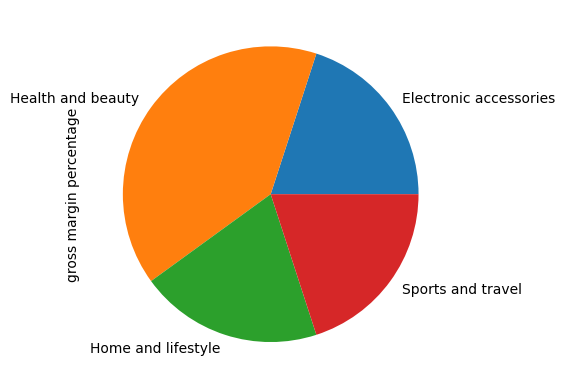

In [251]:
sales.groupby('Product line')['gross margin percentage'].sum().plot.pie()

<Axes: xlabel='Time'>

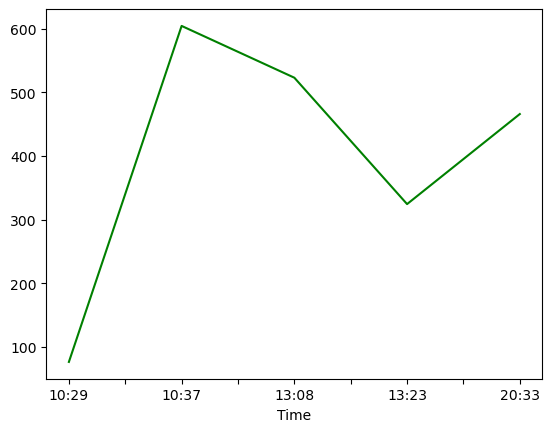

In [207]:
sales.groupby('Time')['Cost of Goods Sold'].sum().plot(c='g')

<Axes: ylabel='Product line'>

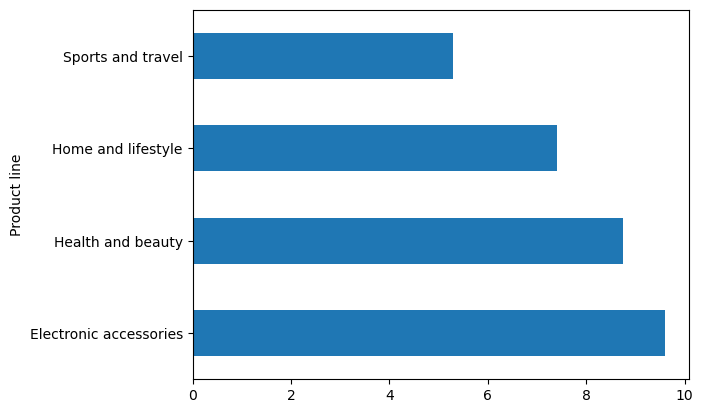

In [255]:
sales.groupby('Product line')['Rating'].mean().plot.barh()

In [245]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Cost of Goods Sold,gross margin percentage,gross income,Rating
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,56.16600,6.800000,19.934700,418.628700,398.694000,4.761905,19.934700,7.960000
std,27.49741,1.095445,10.354177,217.437725,207.083548,0.000000,10.354177,1.700882
min,15.28000,5.000000,3.820000,80.220000,76.400000,4.761905,3.820000,5.300000
25%,46.33000,7.000000,16.215500,340.525500,324.310000,4.761905,16.215500,7.400000
50%,58.22000,7.000000,23.288000,489.048000,465.760000,4.761905,23.288000,8.400000
75%,74.69000,7.000000,26.141500,548.971500,522.830000,4.761905,26.141500,9.100000
max,86.31000,8.000000,30.208500,634.378500,604.170000,4.761905,30.208500,9.600000


## DATA ANALYSIS AND VISUALISATION
1. Determine the times of a day when sales are highest?
2. Analyze customer ratings to gauge satisfaction levels?
3.Determine the payment methods used by customer?
4. Determine which product line are most profitable?
5. Analyse sales by customer demographic(gender and member)
6. Compare sales performance across branches
7. what is the total sales revenue over a specific period?


### Determine the times of a day when sales are highest?

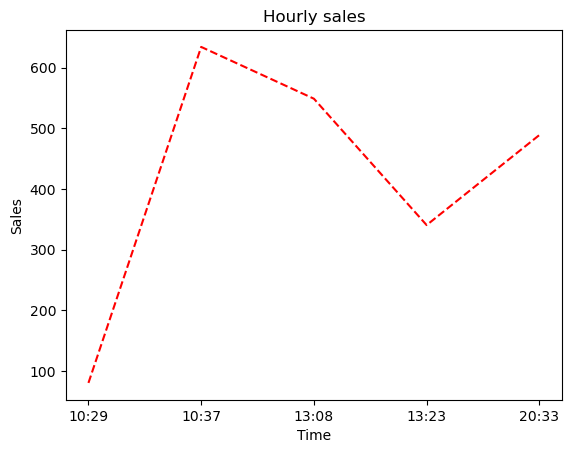

In [294]:
sales_grouped = sales.groupby('Time')['Total'].sum().reset_index()

plt.plot(sales_grouped['Time'],sales_grouped['Total'],c='r',linestyle='--' )
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Hourly sales')
plt.show()



### Analyze customer ratings to gauge satisfaction levels?

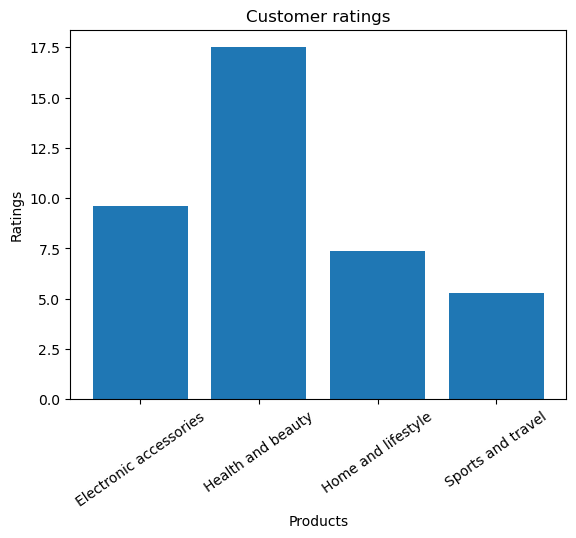

In [369]:
customer_rating = sales.groupby('Product line')['Rating'].sum().reset_index()

plt.bar(customer_rating['Product line'],customer_rating['Rating'])
plt.xlabel('Products')
plt.ylabel('Ratings')
plt.title('Customer ratings')
plt.xticks(rotation= 35)
plt.show()

### Determine the payment methods used by customer?

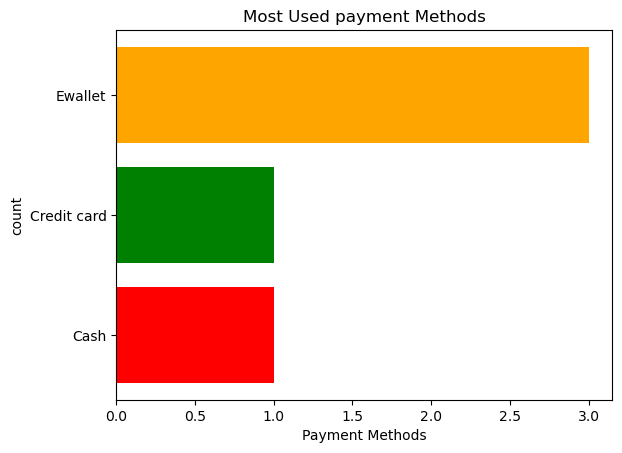

In [357]:
payment_method = sales.groupby('Payment')['Unit price'].count().reset_index()

plt.barh(payment_method['Payment'], payment_method['Unit price'], color=['red','green','orange'])
plt.xlabel('Payment Methods')
plt.ylabel('count')
plt.title('Most Used payment Methods')
plt.show()

### Determine which product line are most profitable?

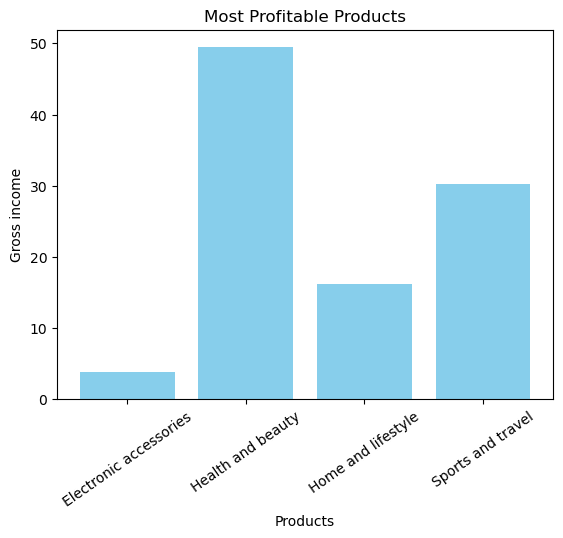

In [363]:
product_profitability = sales.groupby('Product line')['gross income'].sum().reset_index()

plt.bar(product_profitability['Product line'], product_profitability['gross income'], color='skyblue')
plt.xlabel('Products')
plt.ylabel('Gross income')
plt.title('Most Profitable Products')
plt.xticks(rotation=35)
plt.show()


### Analyse sales by customer demographic(gender and member)

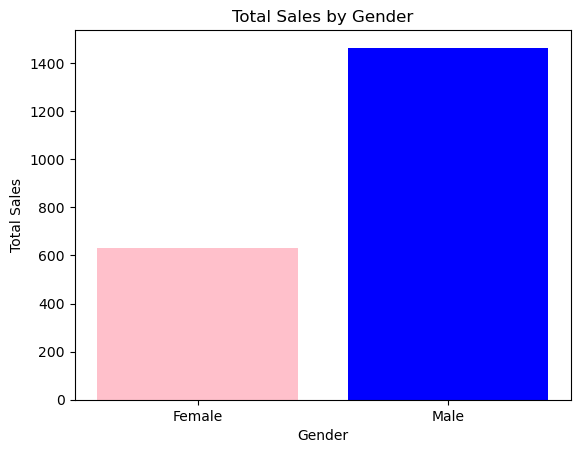

In [377]:
gender_sales = sales.groupby('Gender')['Total'].sum().reset_index()



plt.bar(gender_sales['Gender'], gender_sales['Total'], color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Total Sales by Gender')
plt.show()



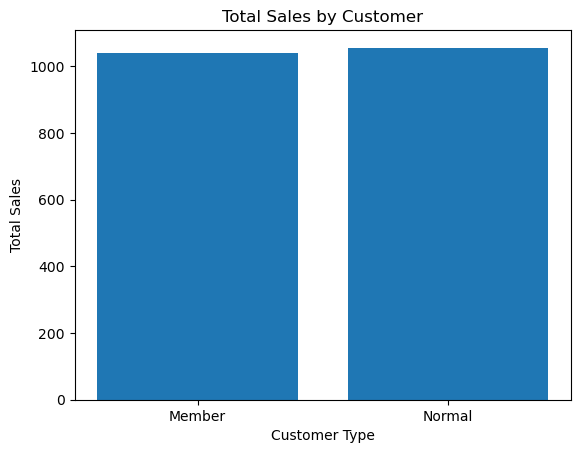

In [381]:
customer_type = sales.groupby('Customer type')[''].sum().reset_index()

plt.bar(customer_type['Customer type'], customer_type['Total'])
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer')
plt.show()


### Compare sales performance across branches

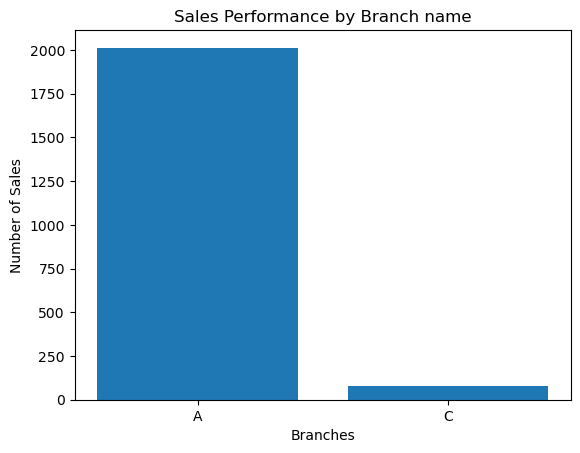

In [393]:
branches_sale = sales.groupby('Branch')['Total'].sum().reset_index()

plt.bar(branches_sale['Branch'],branches_sale['Total'])
plt.xlabel('Branches')
plt.ylabel('Number of Sales')
plt.title('Sales Performance by Branch name')
plt.show()

### what is the total sales revenue over a specific period?

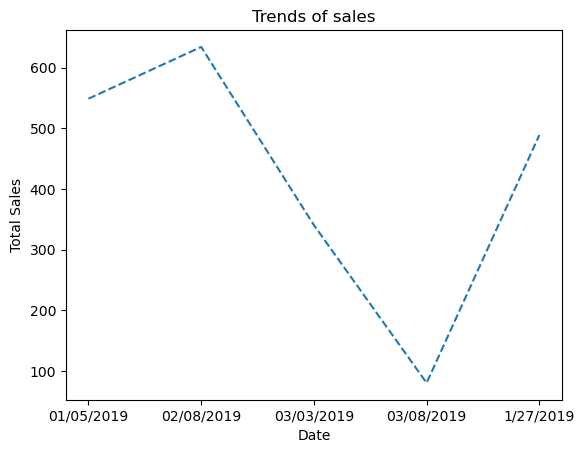

In [430]:
period_sales = sales.groupby('Date')['Total'].sum().reset_index()


plt.plot(period_sales['Date'],period_sales['Total'],linestyle='--' )
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Trends of sales')
plt.show()



### Products ratings 

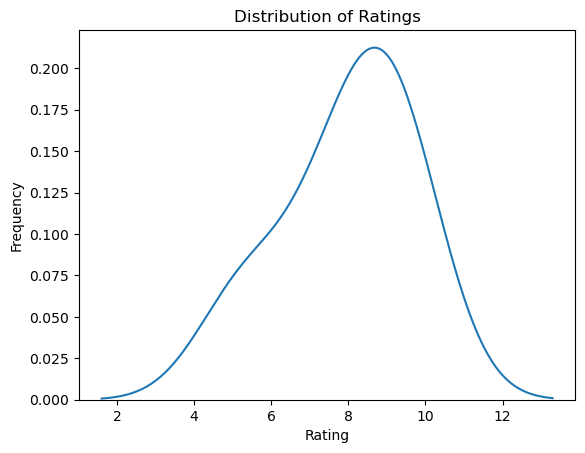

In [487]:

sns.kdeplot(data=sales, x='Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()
